\begin{equation}
\begin{aligned}
    N_{SR}     &= s_{S} N_{SR,s}     + s_{B1} N_{SR,B1}  + s_{B2} N_{SR,B2} \\
    N_{CR_{1}} &= s_{S} N_{CR_{1},s} + s_{B1} N_{CR_{1},B1} + s_{B2} N_{CR_{1},B2} \\
    N_{CR_{2}} &= s_{S} N_{CR_{2},s} + s_{B1} N_{CR_{2},B1} + s_{B2} N_{CR_{2},B2}
\end{aligned}
\end{equation}

\begin{equation}
    \pmatrix{N_{SR} \\  N_{CR_{1}} \\ N_{CR_{2}}}
    =
    \pmatrix{
        N_{SR,s}     & N_{SR,B1}     & N_{SR,B2} \\ 
        N_{CR_{1},s} & N_{CR_{1},B1} & N_{CR_{1},B2} \\
        N_{CR_{2},s} & N_{CR_{2},B1} & N_{CR_{2},B2}
    }
    \pmatrix{
    s_{S} \\
    s_{B1} \\
    s_{B2}
    }
\end{equation}

\begin{equation}
    \pmatrix{\lambda_{SR} \\  \lambda_{CR_{1}} \\ \lambda_{CR_{2}}}
    =
    \pmatrix{
        N_{SR,s}     & N_{SR,B1}     & N_{SR,B2} \\ 
        N_{CR_{1},s} & N_{CR_{1},B1} & N_{CR_{1},B2} \\
        N_{CR_{2},s} & N_{CR_{2},B1} & N_{CR_{2},B2}
    }
    \pmatrix{
    s_{S} \\
    s_{B1} \\
    s_{B2}
    }
\end{equation}

\begin{equation}
    \mathcal{L}
    =
    \mathcal{L}_{SR}
    \mathcal{L}_{CR1}
    \mathcal{L}_{CR2}
\end{equation}

\begin{equation}
    \ln \mathcal{L}
    =
    \ln \mathcal{L}_{SR}
    +
    \ln \mathcal{L}_{CR1}
    +
    \ln \mathcal{L}_{CR2}
\end{equation}

In [14]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
observed_yields = np.array([13.0, 11.0, 10.0])

expected_yield_matrix = np.array([
                    [1, 10, 2],
                    [10, 1, 0.1],
                    [0.0, 5, 5]
])

svec = np.array([1.0, 1.0, 1.0])
exp = expected_yield_matrix.dot(svec)

In [181]:
exp

array([13. , 11.1, 10. ])

In [205]:
class Model:
    
    def __init__(self, expected_yield_matrix, svec, observed_yields):
        self.expected_yield_matrix = expected_yield_matrix
        self.svec = svec
        self.observed_yields = observed_yields
        self.expected_yields = self.expected_yield_matrix.dot(svec)
        
    def calc_log_likelihood(self, svec):
        
        expected_yields = self.expected_yield_matrix.dot(svec)
        ll = np.sum(scipy.stats.poisson.logpmf(k=observed_yields, mu=expected_yields))
        
        return ll        
    
    def calc_log_likelihood_array(self, svec):
        
        svec = np.array(svec)
        expected_yields = expected_yield_matrix.dot(pts.T).T
        ll = np.sum(scipy.stats.poisson.logpmf(k=observed_yields, mu=expected_yields), axis=1)
        
        return ll        

In [206]:
model = Model(expected_yield_matrix=expected_yield_matrix, svec=svec, observed_yields=observed_yields)

In [207]:
npts = 100
grid = np.linspace(0.5, 1.5, npts)

In [220]:
X, Y = np.meshgrid(grid, grid, indexing='xy')

In [209]:
pts = np.c_[np.ones_like(X.flatten()), X.flatten(),Y.flatten()]
Z = model.calc_log_likelihood_array(pts)

In [217]:
Z = model.calc_log_likelihood_array(pts)

In [211]:
scipy.stats.poisson.logpmf(k=observed_yields, mu=expected_yield_matrix.dot(pts[0]))

array([-4.25533192, -2.13492339, -4.01003345])

In [212]:
expected_yield_matrix.dot(pts[0])

array([ 7.  , 10.55,  5.  ])

In [213]:
observed_yields

array([13., 11., 10.])

In [214]:
scipy.stats.poisson.logpmf(k=11.1, mu=10.55)

-inf

In [215]:
Z

array([-10.40028875, -10.26462513, -10.13260235, ...,  -8.34469892,
        -8.39325635,  -8.44230755])

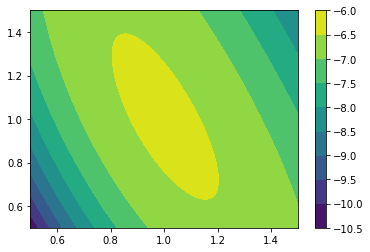

In [216]:
fig, ax = plt.subplots()
cs    = ax.contourf(X,Y,Z.reshape(npts, npts))
cb   = fig.colorbar(cs)

## Testing area

In [194]:
expected_yield_matrix

array([[ 1. , 10. ,  2. ],
       [10. ,  1. ,  0.1],
       [ 0. ,  5. ,  5. ]])

In [152]:
pts[0]

array([1. , 0.5, 0.5])

In [ ]:
expected_yield_matrix.dot(pts[0])

In [102]:
expected_yield_matrix.dot(pts[0])

array([ 7.  , 10.55,  5.  ])

In [103]:
expected_yield_matrix.dot(pts.T).T

array([[ 7.  , 10.55,  5.  ],
       [12.  , 11.05,  7.5 ],
       [17.  , 11.55, 10.  ],
       [ 8.  , 10.6 ,  7.5 ],
       [13.  , 11.1 , 10.  ],
       [18.  , 11.6 , 12.5 ],
       [ 9.  , 10.65, 10.  ],
       [14.  , 11.15, 12.5 ],
       [19.  , 11.65, 15.  ]])

In [ ]:
expected_yield_matrix.dot(pts)

In [94]:
expected_yield_matrix, svec

(array([[ 1. , 10. ,  2. ],
        [10. ,  1. ,  0.1],
        [ 0. ,  5. ,  5. ]]), array([1., 1., 1.]))

In [95]:
expected_yield_matrix.dot(svec)

array([13. , 11.1, 10. ])

In [96]:
np.sum(scipy.stats.poisson.logpmf(k=observed_yields, mu=expected_yield_matrix.dot([1.0, 1.1, 0.9])))

-7.028566702159189

In [97]:
model.calc_log_likelihood([1.0, 1.1, 0.9])

-7.028566702159189